# Importing TensorFlow

In [1]:
!nvidia-smi

Mon Jun 17 02:32:01 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   48C    P5              8W /  100W |      63MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import tensorflow as tf
print(tf.__version__)

2024-06-17 02:32:02.023586: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-17 02:32:02.045716: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 02:32:02.045736: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 02:32:02.046311: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-17 02:32:02.050440: I tensorflow/core/platform/cpu_feature_guar

2.15.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import visualkeras
import os

# Preparing data

In [4]:
base_dir = "./happy_sad_face_data/"
happy_dir = os.path.join(base_dir, "happy/")
sad_dir = os.path.join(base_dir, "sad/")

Sample happy image:


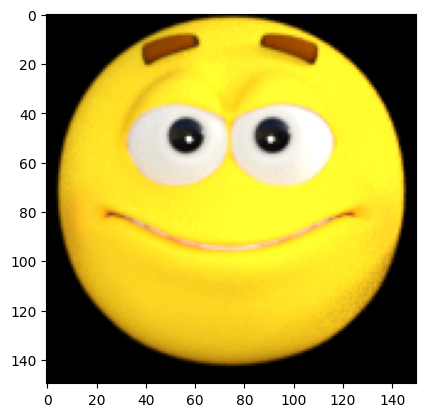


Sample sad image:


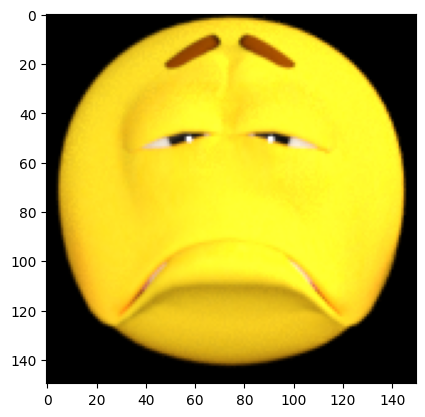

In [5]:
from tensorflow.keras.preprocessing.image import load_img

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import img_to_array

sample_image  = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")
sample_img_as_array = img_to_array(sample_image)

sample_img_as_array.shape, np.min(sample_img_as_array), np.max(sample_img_as_array)

((150, 150, 3), 0.0, 255.0)

Shape of an image is (150,150,3)

Pixel values of an image are between 0. and 255.

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1/255., validation_split=0.25)

train_generator = datagen.flow_from_directory(
    directory=base_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode="binary",
    subset="training"
)

test_generator = datagen.flow_from_directory(
    directory=base_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode="binary",
    subset="validation"
)

Found 60 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


# Creating and training the model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(16, 3, 1, padding="valid", activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, 3, 1, padding="valid", activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, 3, 1, padding="valid", activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

2024-06-17 02:32:03.786164: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6021 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [9]:
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [10]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get("val_accuracy")>0.95) & (logs.get("accuracy")>0.95):
            print("Reached %95 validation accuracy, stopping training")
            self.model.stop_training = True

callback = MyCallback()

In [11]:
history = model.fit(
    x=train_generator,
    validation_data=test_generator,
    epochs=100,
    callbacks=[callback]
)

Epoch 1/100


2024-06-17 02:32:04.449418: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-06-17 02:32:04.502238: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-17 02:32:04.703324: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-17 02:32:04.943521: I external/local_xla/xla/service/service.cc:168] XLA service 0x7c692079f840 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-17 02:32:04.943541: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-06-17 02:32:04.946822: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1718580724.991750   74652 devic

6/6 [==============================] - 2s 44ms/step - loss: 1.6506 - accuracy: 0.5167 - val_loss: 0.6518 - val_accuracy: 1.0000
Epoch 2/100
6/6 [==============================] - 0s 23ms/step - loss: 0.4369 - accuracy: 1.0000 - val_loss: 0.4636 - val_accuracy: 1.0000


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 73984)             0

<Axes: >

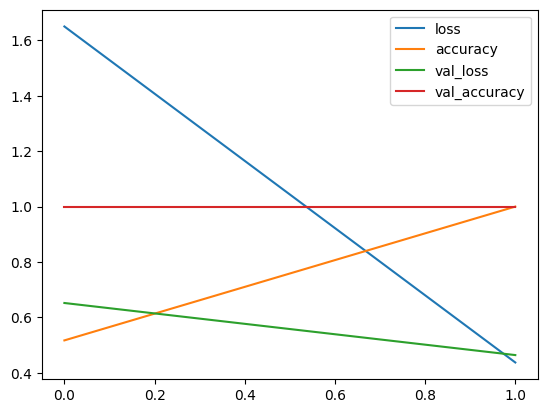

In [13]:
pd.DataFrame(history.history).plot()

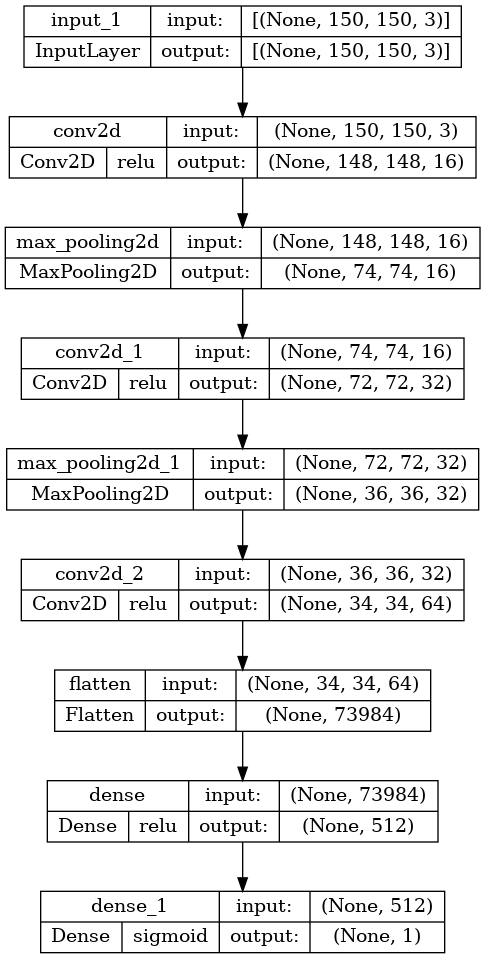

In [15]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

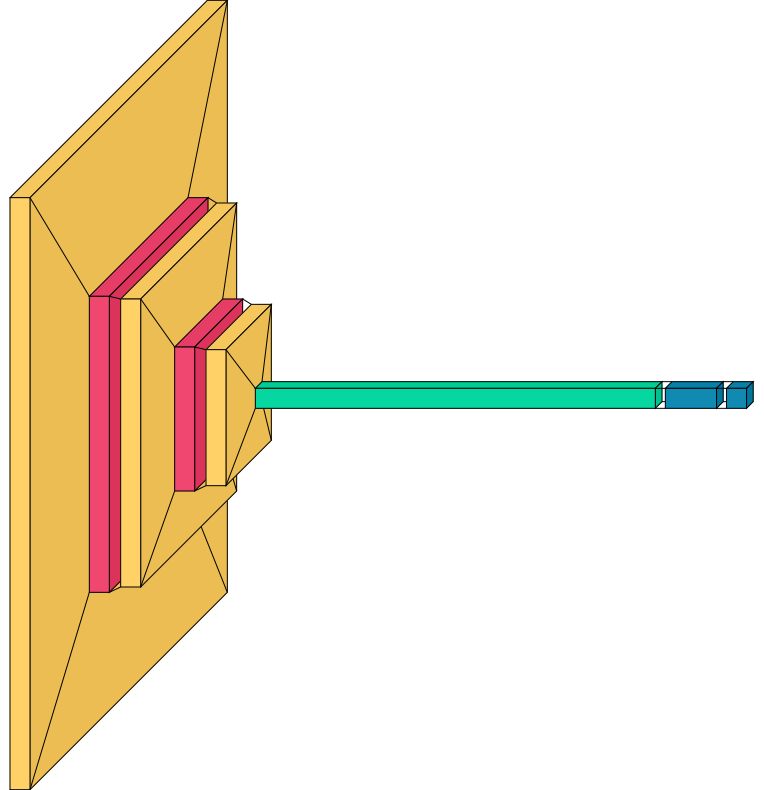

In [16]:
visualkeras.layered_view(model)

# Summary

The model easily achieved 1. accuracy on both training and test images.

However data that we trained the model on was only contains 60 images.

Test data that we evaluated the model with was only contains 20 images.

Results of this training may not be accurate because of insufficient amount of data.

This notebook may be helpful to understand how to use ImageDataGenerator.